# 목차
1. 프로젝트 배경. (은경님)
> 1.1 원래 하고자 했던것과 그 배경.  
> 1.2 시도  
> 1.3 최종 계획 : 원래하고자 했던 것은 이런 것이다.(이런 시도를 했으나 저런 한계점이 있어 이렇게 진행하기로 결정했다.)  
> 1.4 목차 설명.

2. 케글 데이터와 참고 자료. (익한님)
> 2.1 케글데이터 요약.  
> 2.2 참고 자료 : 데이콘 리더보드 1등 요약 설명.

3. 우리 프로젝트의 방향, 진행. (경민님)
> 3.1 전체 리뷰   
> 3.2 사용 컬럼과 특성 생성코드  
> 3.3 클러스터링

4. 군집데이터 분석, 시각화 (남철)
> 4.1 군집별 특성 통계  
> 4.2 군집 해석.  

5. 회고
> 5.1 코로나 시기별 확산 영향력 지표 생성.  
> 5.2 영향력 지표 > 사망자 영향, 경제 피해 영향.  
> 5.3 각 팀원 회고

6. 질의응답

![image](https://user-images.githubusercontent.com/96903388/157706549-73914e26-8205-4459-b384-5fdbf2646bc2.png)

![image](https://user-images.githubusercontent.com/96903388/157707018-893ebda1-95d8-4352-a989-a46effff605e.png)

![image](https://user-images.githubusercontent.com/96903388/157708757-73d0960a-05f9-4900-8ec9-370d51acaa70.png)

# 2. 케글 데이터와 참고 자료

## 2.1 케글데이터 요약

케글데이터는 노선에 있는 데이터셋을 참고했습니다.(https://www.kaggle.com/kimjihoo/coronavirusdataset)

PatientRoute 데이터는 DACON 코로나 데이터 시각화 AI 경진대회에 자료를 참고하였습니다.

데이터들중 필요한부분인 PatientInfo.csv와 PatientRoute.csv 데이터를 활용하였습니다.

PatientInfo에서 얻을수 있는 데이터는 환자아이디(Patient_id), 성별(sex), 나이대(age), 나라(country), 지방(province), 도시(city), 감염사례(infection_case), 감염시킨사람(infected_by), 접촉 수(contact_number), 증상발현시기(symtop_onset_date), 확진일(confirmed_date), 격리해제일(released_date), 사망일(deceased_date), 상태(state)를 확인할 수 있습니다

PatientRoute에서는 환자아이디(patient_id), 질본에서 부여한 번호(global_num), 증상발현시기(date), 지방(province), 도시(city), 발현장소(type), 위도(latitude), 경도(longitude)를 확인할 수 있습니다.

감염자가 얼마나 전파를 하여 우리생활에 밀접적인 관련을 주었느냐에 대해서 분석해야 하기 때문에 patient_by와 infected_by를 활용하여 감염자가 몇명을 접촉했는지 세는 행을 만들어야한다. 그리고 저희가 분석하고 싶은 3밀 컬럼과 노마스크 컬럼을 만들어야 합니다.

![image](https://user-images.githubusercontent.com/97030342/157769056-7505ba2a-989a-4ef7-b265-1fffe4a2c7cb.png)


특히 중점적으로 봤던 부분은 필수적 이동(essential)으로 구분하고, 나머지는 부수적 이동(non-essential) 구분했던 부분인데요

In [ ]:
## categories
leisure = ['library', 'theater', 'cafe', 'bakery', 'beauty_salon',
          'pc_cafe', 'billiards','restaurant', 'bar', 'karaoke']
travel = ['airport', 'lodging']
essential_edu = ['primary_school', 'school', 'university']
non_essential_edu = ['academy']
exercise = ['gym', 'mountain', 'park']
essential_admin = ['administrative_area_level_1', 'governmnet_office', 'post_office']
non_essential_admin = ['police_office', 'bank', 'real_estate_agency']
necessity = ['store', 'public_transportation', 'gas_station']
medical = ['hospital', 'pharmacy']
church = ['church']
etc = ['etc']

essential = essential_edu + essential_admin + necessity + medical 

카테고리 중에서 '필수 교육(essential_edu)/필수 행정(essential_admin)/생활 필수(necessity)/의료(medical)' 카테고리를 필수적 이동(essential)으로 구분하고, 나머지는 부수적 이동(non-essential)으로 정의했는데요. 이를 기반으로 확진자별 필수/부수적 이동의 합계를 구해, 확진자의 유동성을 나타내는 확진자별 필수적/부수적 이동 횟수 테이블이 완성했습니다. 이를 전체 데이터에 확진자별로 더해주어 모델에 활용할 수 있게 했습니다

## 3. 우리 프로젝트의 방향, 진행.

### 3.1 전체 리뷰

#### 3.1.1 데이터 측면
앞에서 언급한 계획에 따라, 확진자의 이동 경로 데이터를 활용한 클러스터링을 진행하고, <font color="orange"> 확진자의 이동 경로가 코로나 확산에 얼마나 기여를 했는지</font>를 알아보고자 합니다. 
<br/><br/>

참고한 자료에서는 확진자가 이동한 장소를 "생활에 필수적인 장소인지?, 혹은 필수적이지는 않은 장소인지?"로 구분하고 수치화 하였습니다. 그러나, 이 수치가 코로나 확산에 얼마나 기여했는지를 나타내지는 못한다고 판단했습니다. 
<br/><br/>  

-> 코로나 확산 기여도 측면에서 확진자를 분류하기위해 몇가지 컬럼을 선정했습니다.
<br/><br/>
* 기본 데이터에서 선택 및 참조
  * "contact_number": 접촉자수
  * "essential": 필수적인 장소 방문 지수
  * "non-essential": 필수적이지 않은 장소 방문 지수
* 생성
  * <font color="orange">3밀</font>
    * <font color="yellow">"밀폐"</font>: 환기가 원활하지 않은 장소 방문 지수
    * <font color="yellow">"밀집"</font>: 많은 사람들이 모이는 장소 방문 지수
    * <font color="yellow">"밀접"</font>: 타인과의 거리가 가까운 장소 방문 지수
  * <font color="orange">"NO마스크"</font>: 마스크를 착용하지 않는 경우가 발생하는 장소 방문 지수
  * <font color="orange">"infecting_count"</font>: 전파 인원수


#### 3.1.2 클러스터링 측면
1. PCA(Principal Component Analysis, 주성분 분석)
* 여러 데이터들이 어떤 분포를 이룰 때, 어떤 데이터가 주로 기여했는지를 분석하는 기법
* 데이터의 종류가 많으면 시각화에 어려움이 있으므로, <font color='orange'>주가 되는 성분을 이용해 데이터의 차원을 축소하여 시각화를 가능하게 하는 의미</font>를 포함
<br/><br/>

2. K-Means 클러스터링
* 데이터에서 각 데이터와 K개의 클러스터 중심사이의 평균(Means)거리를 최소화 하는 방법으로 클러스터링하는 기법
>(1) K개의 중심을 설정  
>(2) 각각의 데이터를 가장 가까운 중심점에 해당하는 클러스터로 분류  
>(3) 분류된 데이터를 기반으로 각 클러스터의 중심점을 업데이트  
>(4) (2)와 (3)을 반복

### 3.2 사용 컬럼과 특성 생성코드

In [1]:
# 코랩환경에서 실습. 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 필요한 패키지 import
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # 싸이킷런 패키지의 StandardScaler 모듈을 import한다
import seaborn as sns # 시각화를 위해 seaborn 패키지를 import
from sklearn.decomposition import PCA # 효과적인 시각화를 위해 차원축소를 하는 싸이킷런 패키지의 PCA 모듈을 import
from sklearn.preprocessing import MinMaxScaler # PCA를 통해 차원 축소후 데이터의 범위를 맞추기 위한 scaler를 import
from sklearn.cluster import KMeans # 클러스터링을 위해 싸이킷런의 KMeans 모듈을 import
import matplotlib.pyplot as plt # 시각화를 위한 패키지 import

In [3]:
# 데이터 불러오기
info_path = '/content/drive/MyDrive/data/covid/PatientInfo.csv'
route_path = '/content/drive/MyDrive/data/covid/PatientRoute.csv'

# patientinfo 데이터 확인.
df = pd.read_csv(info_path)
df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


#### 3.2.1 infecting count 컬럼 만들기 
- 환자가 몇명의 사람에게 전파 했는지 'intected_by' 컬럼의 id 값을 카운팅.
- 카운팅한 값을 'patient_id'에 대응 하여 컬럼 생성.
- 결측치는 전파한 사례가 없다고 생각하여 0으로 값을 설정.

In [4]:
new_df = df.copy() # 수정위해 copy
new_df = new_df[['patient_id','infected_by']] # 필요한 컬럼만 가져오기

new_df['infected_by'] = new_df['infected_by'].fillna('-1') # infected_by 의 nan 값을 -1로 변경, id 번호를 int변환 하기위해 
new_df[new_df['infected_by'].str.contains(',')] # 데이터중 2명에게서 전파받아 확진된 환자가 있으므로, ','검색으로 찾아낸다.

,patient_id,infected_by
3728,5000000022,"1500000050, 1500000055"


In [5]:
# 한 개의 예외 데이터가 있으므로 이를 처리해준다.
new_df = new_df.append(new_df[new_df['infected_by'].str.contains(',')]) # 2명에 의해 전파된 확진자의 행을 추가
new_df.reset_index(drop= True,inplace = True) # 인덱스 초기화.

# 각각의 값을 나누어 준다.
new_df.iloc[5165,1] = '1500000055'
new_df.iloc[3728,1] = '1500000050'

new_df

,patient_id,infected_by
0,1000000001,-1
1,1000000002,-1
2,1000000003,2002000001
3,1000000004,-1
4,1000000005,1000000002
...,...,...
5161,7000000016,-1
5162,7000000017,-1
5163,7000000018,-1
5164,7000000019,-1


In [6]:
# 예외 값이 처리 되었는지 확인
new_df[new_df['infected_by'].str.contains(',')]

,patient_id,infected_by


- 2명이상으로 부터 전파받아 infected_by 에 id 가 2개 인 행이 분리되어 처리되었다.

In [7]:
# id 값이 str 이므로, int로 변환 후 -1로 바꿔주었던 NaN 값을 원래대로 돌려준다.
new_df['infected_by'] = new_df['infected_by'].apply(lambda x:int(x))
new_df['infected_by'] = new_df['infected_by'].replace(-1, np.nan)
new_df

,patient_id,infected_by
0,1000000001,NaN
1,1000000002,NaN
2,1000000003,2.002000e+09
3,1000000004,NaN
4,1000000005,1.000000e+09
...,...,...
5161,7000000016,NaN
5162,7000000017,NaN
5163,7000000018,NaN
5164,7000000019,NaN


In [8]:
infecting_count = new_df.groupby(['infected_by']).count() # id 별로 전파한 사람수를 카운팅.
infecting_count.reset_index(inplace = True) # 인덱스 초기화.
infecting_count

,infected_by,patient_id
0,1.270200e+04,2
1,1.000000e+09,1
2,1.000000e+09,4
3,1.000000e+09,1
4,1.000000e+09,1
...,...,...
602,6.100000e+09,1
603,6.100000e+09,1
604,6.100000e+09,1
605,6.100000e+09,3


In [9]:
# PatientInfo 데이터의 'patient_id'를 기준으로 병합하기 위해 컬럼명 재지정.
infecting_count.rename(columns = {'infected_by': 'patient_id','patient_id':'infecting_count' }, inplace=True)
infecting_count

,patient_id,infecting_count
0,1.270200e+04,2
1,1.000000e+09,1
2,1.000000e+09,4
3,1.000000e+09,1
4,1.000000e+09,1
...,...,...
602,6.100000e+09,1
603,6.100000e+09,1
604,6.100000e+09,1
605,6.100000e+09,3


In [10]:
# 원본 데이터와 merge
df = pd.merge(df, infecting_count, on='patient_id', how = 'outer')

# NaN 값은 전파시킨 사람이 없다고 생각하고 0으로 채워줌
df['infecting_count'] = df['infecting_count'].fillna(0)

df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infecting_count
0,1.000000e+09,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,0.0
1,1.000000e+09,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,1.0
2,1.000000e+09,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,4.0
3,1.000000e+09,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,0.0
4,1.000000e+09,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,7.000000e+09,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,0.0
5165,1.270200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5166,2.002000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5167,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


#### 3.2.2 방문 장소 및 마스크 착용 여부 컬럼 만들기
- 3밀(밀폐, 밀집, 밀접)과 마스크 착용 여부 컬럼 생성하기.

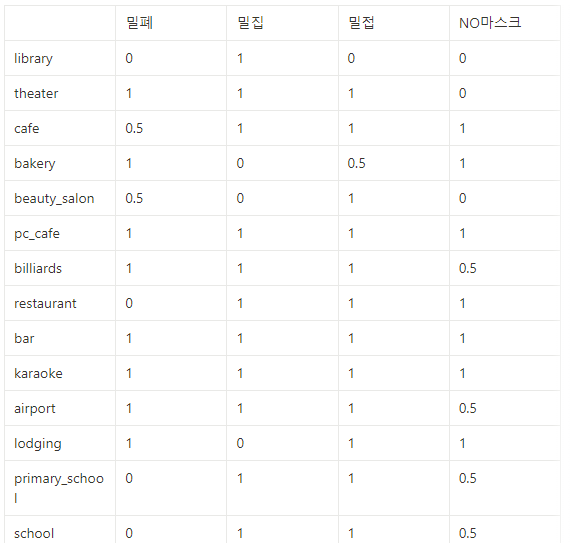

- 방문장소 각각에 대해, 3밀(밀폐, 밀집, 밀접) 과 마스크착용 여부에 따라 수치화.
- 1 : 해당, 0.5 : 중간, 0 : 해당없음.
- 수치 값 선정 기준
> - 정부 발표 코로나 고위험군 시설 참고,
> - 환자별 방문 장소에 대해 수치를 누적합 하여 나타낸다.
> - 카페, 미용실과 같이 환기를 항상하진 않지만, 할수 있는 공간은 0.5로 지정.
> - 공항의 경우 기내 상황을 가정하여, 3밀은 1점, 마스크는 기내식을 먹을 수 있는 공간이므로 0.5점을 주었다.
> - 취식/취음을 위한공간은 아니지만, 가능한 공간에 대해서는 NO마스크 수치를 0.5를 주었다. (학교, 당구장, 산)
> - etc의 경우 모든 항목 0.5 지정.

  >  <font color='skyblue'>예) A 환자의 방문장소 : library, theater 이라면,</font>  
>     밀폐 : 0 + 1 = 1  
      밀집 : 1 + 1 = 2  
      밀접 : 0 + 1 = 1  
      NO마스크 : 0 + 0 = 0 

  **<font color='lightgreen'> 3밀, No 마스크 수치가 클수록 전파가능성이 높은 활동을 했다는 지표로 사용.</font>**

- 참고 자료 [http://ncov.mohw.go.kr/shBoardView.do?brdId=2&brdGubun=25&ncvContSeq=2567]  
<img src="https://user-images.githubusercontent.com/97072815/157613224-d02f4118-37eb-4955-8cb5-cdd7604ba689.png" width="50%" height="50%"/>

In [11]:
# 이동경로 데이터 가져오기
df_route = pd.read_csv(route_path)
df_route

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
...,...,...,...,...,...,...,...,...
6709,6100000090,NaN,2020-03-24,Seoul,Gangseo-gu,airport,37.558655,126.794474
6710,6100000090,NaN,2020-03-24,Busan,Gangseo-gu,airport,35.173220,128.946459
6711,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389
6712,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,hospital,35.335757,129.025003


In [12]:
# 방문장소 목록 확인
df_route['type'].unique()

array(['airport', 'hospital', 'etc', 'store', 'public_transportation',
       'restaurant', 'church', 'beauty_salon', 'pharmacy', 'pc_cafe',
       'bank', 'cafe', 'bakery', 'bar', 'gym', 'school',
       'real_estate_agency', 'karaoke', 'post_office', 'gas_station',
       'lodging', 'academy', 'university', 'administrative_area_level_1'],
      dtype=object)

In [13]:
# 앞에서 선정한 수치로 딕셔너리 생성
# 이후 3밀 점수 및 마스크 착용 여부 점수 누계에서 방문장소를 key값으로 활용하기 위함.
type_dict = {'airport': [1,1,1,0.5],
             'hospital':[1,1,1,0],
             'etc': [0.5,0.5,0.5,0.5],
             'store': [1,1,1,0],
             'public_transportation': [1,1,1,0],
             'restaurant': [0,1,1,1],
             'church': [1,1,1,1],
             'beauty_salon': [0.5,0,1,0],
             'pharmacy': [1,0,1,0],
             'pc_cafe': [1,1,1,1],
             'bank': [0,1,1,0],
             'cafe': [0.5,1,1,1], 
             'bakery': [1,0,0.5,1],
             'bar': [1,1,1,1], 
             'gym': [1,1,1,0], 
             'school': [0,1,1,0.5],
             'real_estate_agency': [1,0,1,0],
             'karaoke' :[1,1,1,1],
             'post_office': [0,1,1,0],
             'gas_station': [0,0,0,0],
             'lodging': [1,0,1,1],
             'academy': [1,1,1,0], 
             'university': [0,1,1,0], 
             'administrative_area_level_1': [0,1,1,0]}

In [14]:
# 3밀, NO마스크 컬럼 추가
df[['밀폐','밀집','밀접','NO마스크']]= 0
df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infecting_count,밀폐,밀집,밀접,NO마스크
0,1.000000e+09,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,0.0,0,0,0,0
1,1.000000e+09,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,1.0,0,0,0,0
2,1.000000e+09,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,4.0,0,0,0,0
3,1.000000e+09,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,0.0,0,0,0,0
4,1.000000e+09,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,7.000000e+09,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,0.0,0,0,0,0
5165,1.270200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,0,0,0
5166,2.002000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0,0,0
5167,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0,0,0


In [15]:
# 3밀, NO마스크 수치 누계 도출.
for a, b in zip(df_route['patient_id'],df_route['type']):
    df['밀폐'].iloc[np.where(df['patient_id']==a)] += type_dict[b][0]
    df['밀집'].iloc[np.where(df['patient_id']==a)] += type_dict[b][1]
    df['밀접'].iloc[np.where(df['patient_id']==a)] += type_dict[b][2]
    df['NO마스크'].iloc[np.where(df['patient_id']==a)] += type_dict[b][3]

df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infecting_count,밀폐,밀집,밀접,NO마스크
0,1.000000e+09,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,0.0,2.0,2.0,2.0,0.5
1,1.000000e+09,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,1.0,10.0,12.0,12.0,3.0
2,1.000000e+09,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,4.0,1.0,2.0,2.0,2.0
3,1.000000e+09,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,0.0,1.0,1.0,1.0,0.0
4,1.000000e+09,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,7.000000e+09,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated,0.0,0.0,0.0,0.0,0.0
5165,1.270200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,0.0
5166,2.002000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0
5167,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0


#### 3.2.3 확진 판정 시간 및 증상 발현 여부 컬럼

- 증상 발현일('symptom_onset_date')로 부터 확진일('confirmed_date')까지의 일수('days')를 계산
- 증상 발현 여부('symptom_onset')를 이진화(발현: 1 / 미발현: 0)하여 컬럼 생성.
- 군집화된 데이터의 특성을 파악 할때 발현여부와 진단기간을 활용

In [16]:
# 확진 판정 시간 컬럼 만들기
# 진단 시간 계산을 위해 데이터 새로 불러오기.
tmp_info =  pd.read_csv(info_path)
tmp_info

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [17]:
# 비어있는 값은 NaN으로 채워줌
tmp_info['symptom_onset_date'] = np.where((tmp_info['symptom_onset_date'] == ' '), None, tmp_info['symptom_onset_date'])
tmp_info['confirmed_date'] = np.where((tmp_info['confirmed_date'] == ' '), None, tmp_info['confirmed_date'])

# NaN 값이 있는 행을 삭제
tmp_info = tmp_info[tmp_info['symptom_onset_date'].notna()]
tmp_info = tmp_info[tmp_info['confirmed_date'].notna()]
tmp_info

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
13,1000000014,female,60s,Korea,Seoul,Jongno-gu,contact with patient,1000000013,27,2020-02-06,2020-02-16,2020-03-12,NaN,released
14,1000000015,male,70s,Korea,Seoul,Seongdong-gu,Seongdong-gu APT,NaN,8,2020-02-11,2020-02-19,NaN,NaN,released
25,1000000026,male,30s,Korea,Seoul,Seocho-gu,etc,NaN,NaN,2020-02-21,2020-02-22,2020-03-11,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5127,6100000115,male,20s,Korea,Gyeongsangnam-do,Changwon-si,etc,NaN,NaN,2020-04-14,2020-04-16,2020-04-25,NaN,released
5128,6100000116,male,60s,Korea,Gyeongsangnam-do,Changwon-si,etc,NaN,NaN,2020-04-20,2020-04-21,2020-05-15,NaN,released
5131,6100000119,female,30s,Korea,Gyeongsangnam-do,Geoje-si,overseas inflow,NaN,NaN,2020-05-14,2020-05-16,2020-05-24,NaN,released
5133,6100000121,male,20s,Korea,Gyeongsangnam-do,Jinju-si,Itaewon Clubs,NaN,NaN,2020-05-17,2020-05-21,NaN,NaN,released


In [18]:
# 날짜 데이터 연산을 위해 pandas.datetime 타입으로 변환.
def convert_date(x):
    x = pd.datetime.strptime(x, '%Y-%m-%d').date()
    return x

In [19]:
# 데이터형 변환
tmp_info['symptom_onset_date'] = tmp_info['symptom_onset_date'].apply(lambda x : convert_date(x))
tmp_info['confirmed_date'] = tmp_info['confirmed_date'].apply(lambda x: convert_date(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
tmp = tmp_info[["symptom_onset_date", "confirmed_date"]] # 계산을 위해 사용할 컬럼만 임시로 가져오기.
tmp['days_notice'] = tmp_info['confirmed_date'] - tmp_info['symptom_onset_date']  # 확진 판정 시간 컬럼을 확진일 - 증상발현일로 생성
tmp['hours_notice'] = tmp['days_notice'].apply(lambda x: round(x.total_seconds()/3600, 2)) # 확진 판정 시간을 시간으로 변환하고
tmp_info['days'] = tmp['hours_notice'].apply(lambda x: int(x/24)) # 변환된 시간을 일수로 변환하여 정수화하고 컬럼 생성
tmp_info

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,days
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,4
13,1000000014,female,60s,Korea,Seoul,Jongno-gu,contact with patient,1000000013,27,2020-02-06,2020-02-16,2020-03-12,NaN,released,10
14,1000000015,male,70s,Korea,Seoul,Seongdong-gu,Seongdong-gu APT,NaN,8,2020-02-11,2020-02-19,NaN,NaN,released,8
25,1000000026,male,30s,Korea,Seoul,Seocho-gu,etc,NaN,NaN,2020-02-21,2020-02-22,2020-03-11,NaN,released,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5127,6100000115,male,20s,Korea,Gyeongsangnam-do,Changwon-si,etc,NaN,NaN,2020-04-14,2020-04-16,2020-04-25,NaN,released,2
5128,6100000116,male,60s,Korea,Gyeongsangnam-do,Changwon-si,etc,NaN,NaN,2020-04-20,2020-04-21,2020-05-15,NaN,released,1
5131,6100000119,female,30s,Korea,Gyeongsangnam-do,Geoje-si,overseas inflow,NaN,NaN,2020-05-14,2020-05-16,2020-05-24,NaN,released,2
5133,6100000121,male,20s,Korea,Gyeongsangnam-do,Jinju-si,Itaewon Clubs,NaN,NaN,2020-05-17,2020-05-21,NaN,NaN,released,4


In [21]:
# 데이터 병합을 위해 필요한 컬럼만 불러오기
tmp_info = tmp_info[["patient_id", "days"]]

# 'patient_id'를 기준으로 데이터 병합
df = pd.merge(df, tmp_info, on="patient_id", how="outer")

# 증상 발현 여부('symptom_onset') 컬럼을 생성하고 'symptom_onset_date'에 값이 있으면 1, 없으면 0을 넣어준다.
df['symptom_onset'] = df['symptom_onset_date'].apply(lambda x: 1 if type(x) == str else 0)

# 추후 데이터 변환이 잘못되면 불러오기 위해 백업 데이터 생성
df_ = df.copy()

df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,...,released_date,deceased_date,state,infecting_count,밀폐,밀집,밀접,NO마스크,days,symptom_onset
0,1.000000e+09,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,...,2020-02-05,NaN,released,0.0,2.0,2.0,2.0,0.5,1.0,1
1,1.000000e+09,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,...,2020-03-02,NaN,released,1.0,10.0,12.0,12.0,3.0,NaN,0
2,1.000000e+09,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,...,2020-02-19,NaN,released,4.0,1.0,2.0,2.0,2.0,NaN,0
3,1.000000e+09,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,...,2020-02-15,NaN,released,0.0,1.0,1.0,1.0,0.0,4.0,1
4,1.000000e+09,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,...,2020-02-24,NaN,released,0.0,1.0,1.0,1.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,7.000000e+09,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,...,NaN,NaN,isolated,0.0,0.0,0.0,0.0,0.0,NaN,0
5165,1.270200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,0.0,0.0,0.0,0.0,NaN,0
5166,2.002000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,NaN,0
5167,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,NaN,0


#### 3.2.4 essential, non-essential 컬럼 생성
* 참고한 자료에서 활용한 지표를 포함하여 군집화에 활용
* 이동 경로 데이터에서 해당 이동이 필수적인 이동이었는지, 불필요한 이동이었는지를 판단하기 위해 장소를 카테고리화한다.
* 카테고리를 기준으로 필수적인지 필수적이지 않은지 컬럼을 나눠 카운팅한다.

In [22]:
# 각각의 장소를 큰 범주로 카테고리화
leisure = ['library', 'theater', 'cafe', 'bakery', 'beauty_salon',
          'pc_cafe', 'billiards','restaurant', 'bar', 'karaoke']
travel = ['airport', 'lodging']
essential_edu = ['primary_school', 'school', 'university']
non_essential_edu = ['academy']
exercise = ['gym', 'mountain', 'park']
essential_admin = ['administrative_area_level_1', 'governmnet_office', 'post_office']
non_essential_admin = ['police_office', 'bank', 'real_estate_agency']
necessity = ['store', 'public_transportation', 'gas_station']
medical = ['hospital', 'pharmacy']
church = ['church']
etc = ['etc']

In [23]:
# 필수적인 이동에 해당한다고 생각하는 장소 카테고리들을 'essential' 카테고리로 합하고, 그 외의 카테고리는 자연스럽게 'non-essential' 카테고리가 된다.
essential = essential_edu + essential_admin + necessity + medical 

# 각각의 'type' 값을 'essential' 혹은 'non-essential' 그룹으로 할당
def type_group_essen(x): 
     
    group = None
    if x in essential: 
        group = 'essential'
    else:
        group = 'non-essential' 
    return group 

# 그룹 할당 결과를 새로운 컬럼으로 추가한다 
df_route['route_group_essential'] = df_route['type'].apply(lambda x: type_group_essen(x)) 
df_route = df_route[['patient_id', 'type', 'route_group_essential']] # 필요한 컬럼만 추출
df_route

,patient_id,type,route_group_essential
0,1000000001,airport,non-essential
1,1000000001,hospital,essential
2,1000000002,etc,non-essential
3,1000000002,store,essential
4,1000000002,public_transportation,essential
...,...,...,...
6709,6100000090,airport,non-essential
6710,6100000090,airport,non-essential
6711,6100000090,store,essential
6712,6100000090,hospital,essential


In [24]:
df_route['route_value'] = 1 # 새로운 컬럼을 생성하여 값을 1로 주고,
g = pd.DataFrame(df_route.groupby(['patient_id', 'route_group_essential'])['route_value'].count().unstack()) # 'patient_id'와 그룹 할당 결과를 바탕으로 'route_value'값을 누적한다.
g = g.fillna(0) # 결측치는 0으로 채움
g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


route_group_essential,essential,non-essential
patient_id,,
1000000001,1.0,1.0
1000000002,9.0,4.0
1000000003,0.0,2.0
1000000004,1.0,0.0
1000000005,1.0,0.0
...,...,...
6100000086,2.0,2.0
6100000087,6.0,2.0
6100000088,5.0,19.0


In [25]:
df = df.merge(g, left_on = 'patient_id', right_on = 'patient_id', how = 'left') # 새로 생성한 컬럼 데이터를 병합한다
df

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,...,state,infecting_count,밀폐,밀집,밀접,NO마스크,days,symptom_onset,essential,non-essential
0,1.000000e+09,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,...,released,0.0,2.0,2.0,2.0,0.5,1.0,1,1.0,1.0
1,1.000000e+09,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,...,released,1.0,10.0,12.0,12.0,3.0,NaN,0,9.0,4.0
2,1.000000e+09,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,...,released,4.0,1.0,2.0,2.0,2.0,NaN,0,0.0,2.0
3,1.000000e+09,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,...,released,0.0,1.0,1.0,1.0,0.0,4.0,1,1.0,0.0
4,1.000000e+09,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,...,released,0.0,1.0,1.0,1.0,0.0,NaN,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,7.000000e+09,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,...,isolated,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN
5165,1.270200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN
5166,2.002000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN
5167,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN


#### 3.2.5 군집화를 위한 데이터 만들기

* 'contact_number' 컬럼은 숫자로 이루어진 문자열인데, 정수화 과정에서 오류 발생  
\-> 확인 결과, 숫자가 아닌 '-' 문자열을 발견
* 예외 데이터를 처리해줌

In [26]:
# 'contact_number'의 값이 '-'인 행을 찾는다.
df[df['contact_number'] == '-']

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,...,state,infecting_count,밀폐,밀집,밀접,NO마스크,days,symptom_onset,essential,non-essential
2196,1.700000e+09,female,50s,Korea,Sejong,Sejong,contact with patient,1700000021,-,2020-03-12,...,released,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,NaN
2197,1.700000e+09,male,40s,Korea,Sejong,Sejong,Ministry of Oceans and Fisheries,NaN,-,2020-03-09,...,released,0.0,1.0,3.0,3.0,2.0,3.0,1,1.0,2.0
2207,1.700000e+09,male,40s,Korea,Sejong,Sejong,overseas inflow,NaN,-,NaN,...,released,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN
2208,1.700000e+09,male,10s,Korea,Sejong,Sejong,overseas inflow,NaN,-,NaN,...,released,0.0,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN


In [27]:
# 찾은 데이터의 인덱스에 접근하여 값을 0으로 할당하고, 제대로 처리되었는지 확인
df.iloc[[2196, 2197, 2207, 2208], 8] = 0
df[df['contact_number'] == '-']

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,...,state,infecting_count,밀폐,밀집,밀접,NO마스크,days,symptom_onset,essential,non-essential


---

In [28]:
# 군집화 및 군집화된 데이터 분석에 필요한 컬럼들만 추출하여 새로운 데이터 생성
df_2 = df[["patient_id", "sex", "age", "contact_number", "days", "밀폐", "밀집", "밀접", "NO마스크", "infecting_count", "essential", "non-essential", "symptom_onset"]]
df_2

,patient_id,sex,age,contact_number,days,밀폐,밀집,밀접,NO마스크,infecting_count,essential,non-essential,symptom_onset
0,1.000000e+09,male,50s,75,1.0,2.0,2.0,2.0,0.5,0.0,1.0,1.0,1
1,1.000000e+09,male,30s,31,NaN,10.0,12.0,12.0,3.0,1.0,9.0,4.0,0
2,1.000000e+09,male,50s,17,NaN,1.0,2.0,2.0,2.0,4.0,0.0,2.0,0
3,1.000000e+09,male,20s,9,4.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1
4,1.000000e+09,female,20s,2,NaN,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,7.000000e+09,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
5165,1.270200e+04,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.0,NaN,NaN,0
5166,2.002000e+09,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0
5167,2.017000e+09,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0


In [38]:
# 실제 군집화에 필요한 컬럼들을 리스트화
inputs = ["contact_number", "밀폐", "밀집", "밀접", "NO마스크", "infecting_count", "essential", "non-essential"]

# 군집화된 레이블값 컬럼을 병합하기 위해 'patient_id' 컬럼과 inputs 컬럼을 이용해 새로운 데이터를 생성하여, NaN 값이 있는 행은 삭제하고 인덱스를 초기화 한다
data_c = df_2[["patient_id"]+inputs].dropna().reset_index(drop=True)
data_c

,patient_id,contact_number,밀폐,밀집,밀접,NO마스크,infecting_count,essential,non-essential
0,1.000000e+09,75,2.0,2.0,2.0,0.5,0.0,1.0,1.0
1,1.000000e+09,31,10.0,12.0,12.0,3.0,1.0,9.0,4.0
2,1.000000e+09,17,1.0,2.0,2.0,2.0,4.0,0.0,2.0
3,1.000000e+09,9,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,1.000000e+09,2,1.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
335,6.001000e+09,4,4.0,3.0,4.0,0.0,0.0,4.0,0.0
336,6.001000e+09,2,2.5,2.5,2.5,1.5,0.0,1.0,3.0
337,6.001000e+09,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0
338,6.014000e+09,11,3.5,3.5,3.5,2.0,0.0,1.0,4.0


In [39]:
# 'contact_number' 값을 보기위해 정수화한다.
data_c['contact_number'] = data_c['contact_number'].apply(lambda x: int(x))

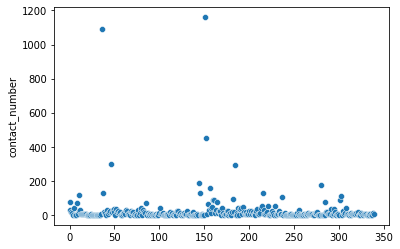

In [31]:
# 시각화하여 특이값이 있는지 확인
ax = sns.scatterplot(x=data_c.index, y='contact_number', data = data_c) 
display()

In [40]:
# 'contact_number'가 400 이상이면 특이값이라 생각하여 이 값이 있는 행을 삭제하고 인덱스를 초기화한다.
data_c = data_c[data_c['contact_number']<400]
data_c.reset_index(drop=True, inplace=True)
data_c

,patient_id,contact_number,밀폐,밀집,밀접,NO마스크,infecting_count,essential,non-essential
0,1.000000e+09,75,2.0,2.0,2.0,0.5,0.0,1.0,1.0
1,1.000000e+09,31,10.0,12.0,12.0,3.0,1.0,9.0,4.0
2,1.000000e+09,17,1.0,2.0,2.0,2.0,4.0,0.0,2.0
3,1.000000e+09,9,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,1.000000e+09,2,1.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
332,6.001000e+09,4,4.0,3.0,4.0,0.0,0.0,4.0,0.0
333,6.001000e+09,2,2.5,2.5,2.5,1.5,0.0,1.0,3.0
334,6.001000e+09,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0
335,6.014000e+09,11,3.5,3.5,3.5,2.0,0.0,1.0,4.0


In [41]:
# 실제로 군집화하기위한 데이터를 생성
data_c_ = data_c[inputs].copy()
data_c_

,contact_number,밀폐,밀집,밀접,NO마스크,infecting_count,essential,non-essential
0,75,2.0,2.0,2.0,0.5,0.0,1.0,1.0
1,31,10.0,12.0,12.0,3.0,1.0,9.0,4.0
2,17,1.0,2.0,2.0,2.0,4.0,0.0,2.0
3,9,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,2,1.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
332,4,4.0,3.0,4.0,0.0,0.0,4.0,0.0
333,2,2.5,2.5,2.5,1.5,0.0,1.0,3.0
334,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0
335,11,3.5,3.5,3.5,2.0,0.0,1.0,4.0


### 3.3 클러스터링

#### 3.3.1 스케일링
* 컬럼들의 번위가 제각각이고 그 차가 굉장히 크기도 하므로 클러스터링이 원활히 진행되지 않는다.
* 평균과 분산이 0과 1인 분포를 가지도록 데이터를 정규화해준다.

In [42]:
# 스케일링
X = data_c_.values # 데이터의 values(배열 형식)를 새로운 값으로 할당
scaler = StandardScaler() # 스케일러를 불러온다.
X = scaler.fit_transform(X) # 배열 형태의 데이터를 불러온 스케일러로 스케일링해준다.

[0.63571764 0.14630341]


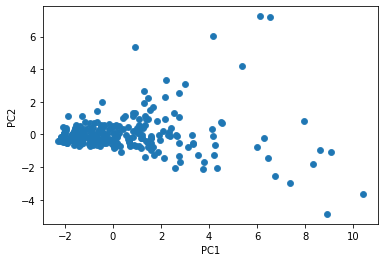

In [43]:
# PCA
pca = PCA(n_components = 2) # 2차원으로 축소하기 위해 PCA모듈을 불러온다.
principalComponents = pca.fit_transform(X) # 스케일링된 데이터를 입력하여 데이터의 차원을 축소
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2']) # 시각화를 위해 DataFrame으로 타입 변환
print(pca.explained_variance_ratio_) # 차원 축소된 데이터가 얼만큼 원 데이터를 표현해주는지 확인

# 시각화
ax = sns.scatterplot(x='PC1', y='PC2', data = principalDF) # scatterplot을 생성
sns.regplot(x=principalDF['PC1'], y=principalDF['PC2'], fit_reg=False) # 축소된 차원 각각을 x, y축으로 하여 분포 확인

display()

* 각 차원의 범위가 동일하지 않으므로, 어느 한 차원만이 클러스터링에 강한 연관성을 줄 수 있음
* MinMax Scaler를 사용하여 각 차원의 범위를 \[0, 1]로 맞춰준다.

In [44]:
temp = pd.DataFrame(principalComponents) # PCA를 통해 나온 데이터를 DataFrame 타입으로 변환

X_ = temp.values # values 값을 취해 배열 형태로 만들고
scaler_ = MinMaxScaler() # MinMaxScaler를 불러온다.
X_ = scaler_.fit_transform(X_) # MinMaxScaler를 통해 두 차원의 범위를 [0, 1]로 만든다.

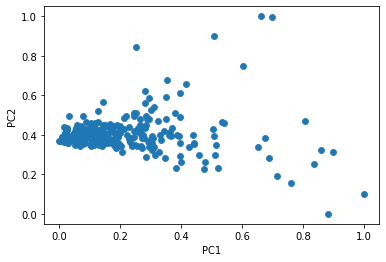

In [47]:
# 다시 한번 분포를 확인해본다.
df_X_ = pd.DataFrame(data = X_, columns = ['PC1', 'PC2'])
ax = sns.scatterplot(x='PC1', y='PC2', data = df_X_) 
sns.regplot(x=df_X_['PC1'], y=df_X_['PC2'], fit_reg=False)

display() # x, y축의 범위가 동일하게 [0, 1]로 변화되었다.

#### 3.3.2 클러스터링
* K-Means 클러스터링을 효과적으로 하기 위해 몇 개의 집단으로 클러스터링 할 지 확인한다.
* 클러스터링을 진행하여 데이터를 저장한다. 

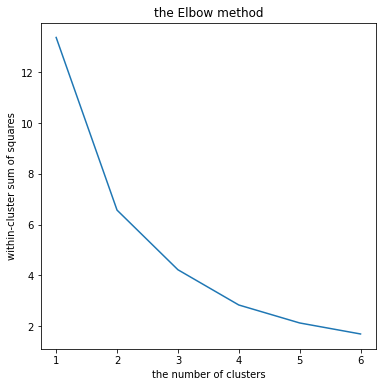

In [45]:
# K-Means 클러스터링에서 n 값을 알아내기위해 몇가지 값을 넣어서 확인
cluster_range = range(1,7)
cluster_errors = [] # sum of squares를 저장할 리스트 생성

# n값이 1부터 6까지 들어가며 클러스터링을 진행하고 sum of squared값을 저장한다
for n in cluster_range:
    cluster = KMeans(n) 
    cluster.fit(X_)
    cluster_errors.append(cluster.inertia_)

# 시각화 진행
plt.figure(figsize = (6,6))
plt.plot(cluster_range, cluster_errors)
plt.title('the Elbow method')
plt.xlabel('the number of clusters')
plt.ylabel('within-cluster sum of squares')
display()

* 클러스터의 수가 2일 때 가장 급격히 꺾이지만, 위 데이터 분포를 봤을 때 4개로 분류하면 좋을 것이라 생각하여 클러스터 수는 4로 설정

In [55]:
# K-Means 클러스터를 이용하여 클러스터 4개의 클러스터링을 수행
km = KMeans(n_clusters = 4)
km.fit(X_)

#centroids = km.cluster_centers_ 
# 클러스터링된 결과를 'label' 컬럼에 추가한다.
labels= km.labels_
df_X_['label'] = labels

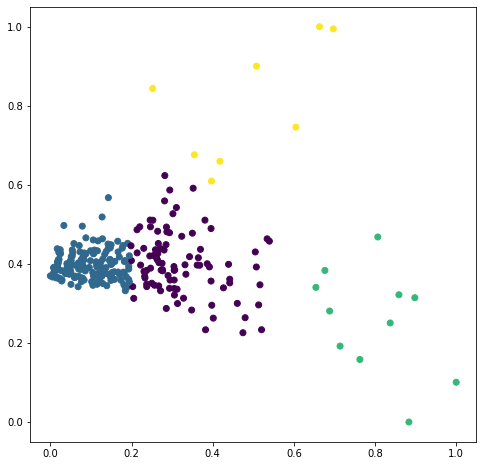

In [56]:
# 시각화
plt.figure(figsize = (8,8))
plt.scatter('PC1', 'PC2', data = df_X_, c = labels) # 'label' 값에 따라 색을 달리하여 클러스터링 결과를 표시

display()

In [57]:
data_c_2 = data_c.copy() # 'patient_id'를 포함하는 데이터를 복제 
data_c_2[['PC1', 'PC2', 'label']] = df_X_ # 'PC1', 'PC2', 'label' 컬럼을 추가하고 df_X_에서 값을 가져온다.
data_c_2

,patient_id,contact_number,밀폐,밀집,밀접,NO마스크,infecting_count,essential,non-essential,PC1,PC2,label
0,1.000000e+09,75,2.0,2.0,2.0,0.5,0.0,1.0,1.0,0.078695,0.495454,1
1,1.000000e+09,31,10.0,12.0,12.0,3.0,1.0,9.0,4.0,0.395922,0.489465,0
2,1.000000e+09,17,1.0,2.0,2.0,2.0,4.0,0.0,2.0,0.071064,0.446493,1
3,1.000000e+09,9,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.018631,0.400308,1
4,1.000000e+09,2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.015866,0.389143,1
...,...,...,...,...,...,...,...,...,...,...,...,...
332,6.001000e+09,4,4.0,3.0,4.0,0.0,0.0,4.0,0.0,0.106323,0.425431,1
333,6.001000e+09,2,2.5,2.5,2.5,1.5,0.0,1.0,3.0,0.083190,0.359055,1
334,6.001000e+09,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.015471,0.387548,1
335,6.014000e+09,11,3.5,3.5,3.5,2.0,0.0,1.0,4.0,0.120743,0.363289,1


In [58]:
# 클러스터링된 데이터의 분석을 위해 다른 정보들도 추가해준다.
da = data_c_2[['patient_id', 'PC1', 'PC2', 'label']] # 위 데이터에서 새로 추가 된 'PC1', 'PC2', 'label' 컬럼과, 병합의 기준인 'patient_id'를 추출
data_save = pd.merge(da, df_2, on='patient_id', how='inner') # 기존 전체 데이터와 방금 만들어진 데이터를 변합한다.
data_save

,patient_id,PC1,PC2,label,sex,age,contact_number,days,밀폐,밀집,밀접,NO마스크,infecting_count,essential,non-essential,symptom_onset
0,1.000000e+09,0.078695,0.495454,1,male,50s,75,1.0,2.0,2.0,2.0,0.5,0.0,1.0,1.0,1
1,1.000000e+09,0.395922,0.489465,0,male,30s,31,NaN,10.0,12.0,12.0,3.0,1.0,9.0,4.0,0
2,1.000000e+09,0.071064,0.446493,1,male,50s,17,NaN,1.0,2.0,2.0,2.0,4.0,0.0,2.0,0
3,1.000000e+09,0.018631,0.400308,1,male,20s,9,4.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1
4,1.000000e+09,0.015866,0.389143,1,female,20s,2,NaN,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,6.001000e+09,0.106323,0.425431,1,male,80s,4,NaN,4.0,3.0,4.0,0.0,0.0,4.0,0.0,0
333,6.001000e+09,0.083190,0.359055,1,male,20s,2,4.0,2.5,2.5,2.5,1.5,0.0,1.0,3.0,1
334,6.001000e+09,0.015471,0.387548,1,female,60s,1,NaN,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
335,6.014000e+09,0.120743,0.363289,1,female,60s,11,NaN,3.5,3.5,3.5,2.0,0.0,1.0,4.0,0


In [59]:
# 클러스터링 정보를 포함한 데이터 저장
data_save.to_csv('last_data.csv')

# 4. 군집데이터 분석, 시각화
## - 군집 컬럽 통계 : 군집데이터의 각 컬럼별 분포와 수치를 확인합니다.
## - 컬럼의 성격에 맞게 군집별 특징을 잘 설명하는 해석을 도출합니다.

## 4.1 군집 컬럼 통계
![image](https://user-images.githubusercontent.com/87751063/157759716-3ee3814b-799e-46b5-b6c0-df657cefe223.png)

![image](https://user-images.githubusercontent.com/87751063/157759844-830d2909-e9ad-404c-9c92-eff760635eba.png)

![image](https://user-images.githubusercontent.com/87751063/157759904-989cdf4a-bb67-4d6f-8c18-70f72cebba6e.png)

![image](https://user-images.githubusercontent.com/87751063/157759957-7710c05a-7d09-4564-a354-2aadb022b3bb.png)

![image](https://user-images.githubusercontent.com/87751063/157760061-63dcae0a-5dfb-43c5-99d7-75149aeb47a6.png)

![image](https://user-images.githubusercontent.com/87751063/157760145-03724320-2053-4d9b-87ca-d99501544bb1.png)

![image](https://user-images.githubusercontent.com/87751063/157760200-5cbf6846-f89a-44b6-bd11-3bb958068513.png)
## 4.2 군집 해석 도출
![image](https://user-images.githubusercontent.com/87751063/157772696-b0f0f50f-13c4-4f21-a795-349d422ad3ad.png)


# 5. 더 해볼만한 것과 팀원 회고
## 5.1 코로나 시기별 확산 영향력 지표 생성.
 - 앞서 얻은 군집별 코로나 확산 영향력 지표를 생성한다. 해당 시기에 신규확진자수에 따른 사회적거리두기 단계 상향 기준을 반영한다. 결과 만약 신규확진자가 발생한다면, 확진자의 사회적거리두기단계 상향에 대한 영향력을 얻는다.

## 5.2 영향력 지표 > 사망자 영향, 경제 피해 영향.
- 해당기간 소상공인, 자영업자들의 영업손실 데이터를 구한다. 영향력 지표를 통해 확진자의 영향력으로 얼마만큼의 금전전 손실을 발생할지 예측할수 있을 것이다.
- 그간 코로나 전파의 책임은 공동체의 책임이었다. 하지만 손실을 입은 사람들은 빚을내고 어떻게 해서든 버티고 있다. 정부는 기준에 따라 거리두기를 조정한다고 한다. 직접적인 책임은 정부에 있을것이지만, 확진자 하나하나가 모여 여러 바이러스가 전파되었다. 왜 개인은 아무런 책임감도 못느끼는 것일까? 내 생활양식을 대입하여 내가 확진되었을때, 나의 코로나확산 영향력과 그로인한 소상공인, 자영업자의 금전 손실을 알게 된다면, 조금은 책임감을 갖고 공공방역수칙 준수와 사회적 거리두기 자발적 참여에 적극적이지 않을까 생각한다.

## 5.3 각 팀원 회고


![image](https://user-images.githubusercontent.com/96903388/157772381-5beb859e-9ba8-4560-b1f7-05d6ab220b65.png)

---

# 상세 코드(4. 군집데이터 분석, 시각화)

# 군집 데이터 준비

In [ ]:
# 패키지 불러오기
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# 화면 스타일 설정하기
sns.set_style("whitegrid")

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/datathon/clustered_data/last_data.csv')
df

,Unnamed: 0,patient_id,PC1,PC2,label,sex,age,contact_number,days,밀폐,밀집,밀접,NO마스크,infecting_count,essential,non-essential,symptom_onset
0,0,1.000000e+09,0.078695,0.495454,1,male,50s,75,1.0,2.0,2.0,2.0,0.5,0.0,1.0,1.0,1
1,1,1.000000e+09,0.395922,0.489465,0,male,30s,31,NaN,10.0,12.0,12.0,3.0,1.0,9.0,4.0,0
2,2,1.000000e+09,0.071064,0.446493,1,male,50s,17,NaN,1.0,2.0,2.0,2.0,4.0,0.0,2.0,0
3,3,1.000000e+09,0.018631,0.400308,1,male,20s,9,4.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1
4,4,1.000000e+09,0.015866,0.389143,1,female,20s,2,NaN,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,332,6.001000e+09,0.106323,0.425431,1,male,80s,4,NaN,4.0,3.0,4.0,0.0,0.0,4.0,0.0,0
333,333,6.001000e+09,0.083190,0.359055,1,male,20s,2,4.0,2.5,2.5,2.5,1.5,0.0,1.0,3.0,1
334,334,6.001000e+09,0.015471,0.387548,1,female,60s,1,NaN,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0
335,335,6.014000e+09,0.120743,0.363289,1,female,60s,11,NaN,3.5,3.5,3.5,2.0,0.0,1.0,4.0,0


In [ ]:
# 3밀 컬럼 추가.
df['3밀'] = df['밀폐'] + df['밀집'] + df['밀접']
df

,Unnamed: 0,patient_id,PC1,PC2,label,sex,age,contact_number,days,밀폐,밀집,밀접,NO마스크,infecting_count,essential,non-essential,symptom_onset,3밀
0,0,1.000000e+09,0.078695,0.495454,1,male,50s,75,1.0,2.0,2.0,2.0,0.5,0.0,1.0,1.0,1,6.0
1,1,1.000000e+09,0.395922,0.489465,0,male,30s,31,NaN,10.0,12.0,12.0,3.0,1.0,9.0,4.0,0,34.0
2,2,1.000000e+09,0.071064,0.446493,1,male,50s,17,NaN,1.0,2.0,2.0,2.0,4.0,0.0,2.0,0,5.0
3,3,1.000000e+09,0.018631,0.400308,1,male,20s,9,4.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1,3.0
4,4,1.000000e+09,0.015866,0.389143,1,female,20s,2,NaN,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,332,6.001000e+09,0.106323,0.425431,1,male,80s,4,NaN,4.0,3.0,4.0,0.0,0.0,4.0,0.0,0,11.0
333,333,6.001000e+09,0.083190,0.359055,1,male,20s,2,4.0,2.5,2.5,2.5,1.5,0.0,1.0,3.0,1,7.5
334,334,6.001000e+09,0.015471,0.387548,1,female,60s,1,NaN,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0,3.0
335,335,6.014000e+09,0.120743,0.363289,1,female,60s,11,NaN,3.5,3.5,3.5,2.0,0.0,1.0,4.0,0,10.5


In [ ]:
# plt 한글 출력을 위해 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 이후 런타임 다시시작.후 본 셀 제외 처음부터 실행.

In [ ]:
# 폰트 설정하기
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 라벨 데이터 타입 변환.
df['label'] = df['label'].astype(str)

# 단순 시각화 코드

 분석에 사용할 컬럼
- age,contact_number, 3밀(밀폐, 밀집, 밀접), NO마스크, essential, non-essential, infecting_count
- sex, days

In [ ]:
# 군집별 규모
df.groupby(['label']).count()['Unnamed: 0']

label
0     96
1    223
2     11
3      7
Name: Unnamed: 0, dtype: int64

In [ ]:
age_order = ['0s','10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s']

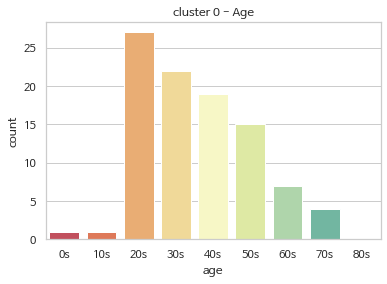

In [ ]:
sns.countplot(x = "age", data = df[df['label']=='0'], palette = 'Spectral', order = age_order)
plt.title('cluster 0 - Age')
plt.show()

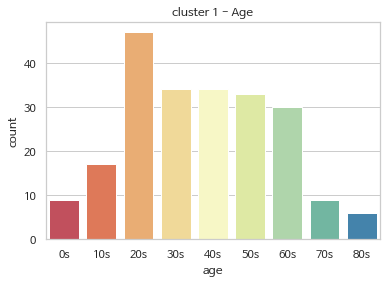

In [ ]:
sns.countplot(x = "age", data = df[df['label']=='1'], palette = 'Spectral', order = age_order)
plt.title('cluster 1 - Age')
plt.show()

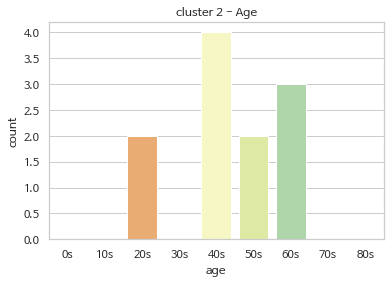

In [ ]:
sns.countplot(x = "age", data = df[df['label']=='2'], palette = 'Spectral', order = age_order)
plt.title('cluster 2 - Age')
plt.show()

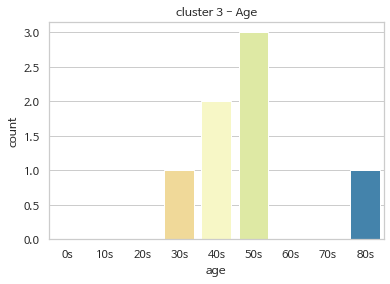

In [ ]:
sns.countplot(x = "age", data = df[df['label']=='3'], palette = 'Spectral', order = age_order)
plt.title('cluster 3 - Age')
plt.show()

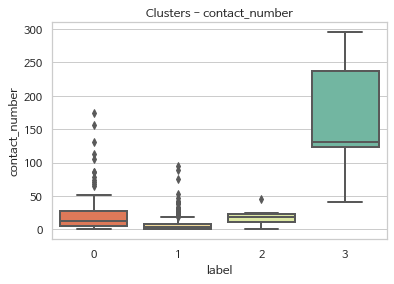

In [ ]:
# 3. 군집별 컬럼별 박스플롯
sns.boxplot(x = "label", y = "contact_number", data = df, palette = 'Spectral', linewidth = 2,width = 0.8, order=['0','1','2','3'])
plt.title('Clusters - contact_number')
plt.show()

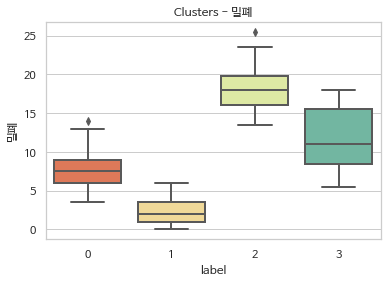

In [ ]:
sns.boxplot(x = "label", y = "밀폐", data = df, palette = 'Spectral', linewidth = 2, width = 0.8,order=['0','1','2','3'])
plt.title('Clusters - 밀폐')
plt.show()

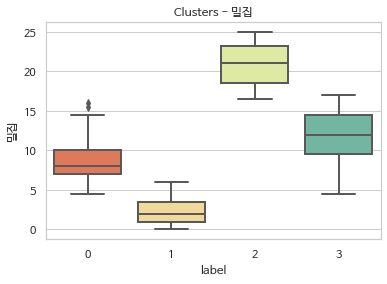

In [ ]:
sns.boxplot(x = "label", y = "밀집", data = df, palette = 'Spectral', linewidth = 2, width = 0.8,order=['0','1','2','3'])
plt.title('Clusters - 밀집')
plt.show()

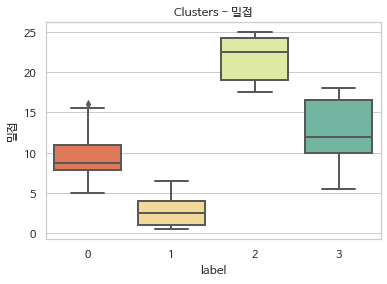

In [ ]:
sns.boxplot(x = "label", y = "밀접", data = df, palette = 'Spectral', linewidth = 2, width = 0.8,order=['0','1','2','3'])
plt.title('Clusters - 밀접')
plt.show()

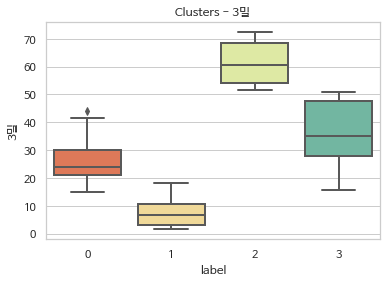

In [ ]:
sns.boxplot(x = "label", y = "3밀", data = df, palette = 'Spectral', linewidth = 2, width = 0.8,order=['0','1','2','3'])
plt.title('Clusters - 3밀')
plt.show()

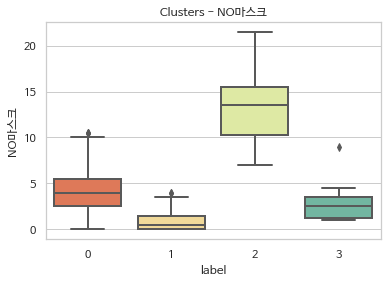

In [ ]:
sns.boxplot(x = "label", y = "NO마스크", data = df, palette = 'Spectral', linewidth = 2, width = 0.8,order=['0','1','2','3'])
plt.title('Clusters - NO마스크')
plt.show()

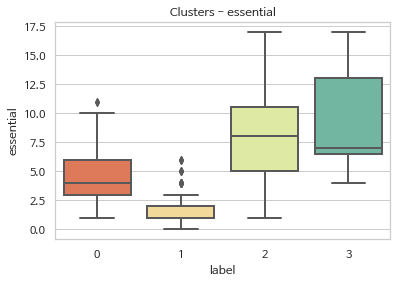

In [ ]:
sns.boxplot(x = "label", y = "essential", data = df, palette = 'Spectral', linewidth = 2, width = 0.8,order=['0','1','2','3'])
plt.title('Clusters - essential')
plt.show()

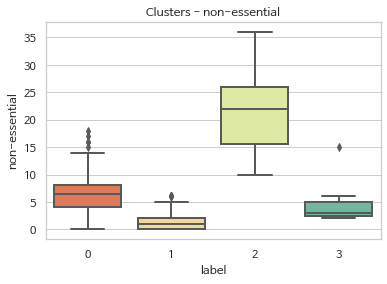

In [ ]:
sns.boxplot(x = "label", y = "non-essential", data = df, palette = 'Spectral', linewidth = 2, width = 0.8,order=['0','1','2','3'])
plt.title('Clusters - non-essential')
plt.show()

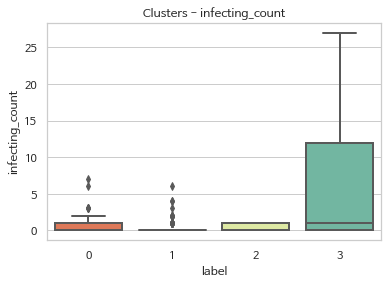

In [ ]:
sns.boxplot(x = "label", y = "infecting_count", data = df, palette = 'Spectral', linewidth = 2, width = 0.8,order=['0','1','2','3'])
plt.title('Clusters - infecting_count')
plt.show()

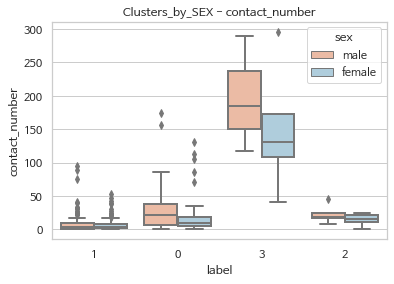

In [ ]:
# 남여
sns.boxplot(x = "label", y = "contact_number",  hue = "sex", palette = "RdBu", data = df, linewidth = 2, width = 0.8, )
plt.title('Clusters_by_SEX - contact_number')
plt.show()

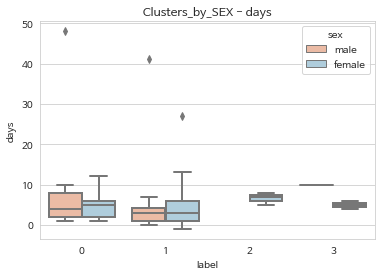

In [ ]:
# 남여

sns.boxplot(x = "label", y = "days",  hue = "sex", palette = "RdBu", data = df, linewidth = 2, width = 0.8)
plt.title('Clusters_by_SEX - days')
plt.show()

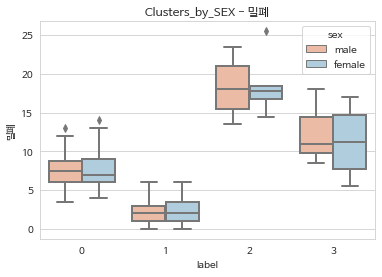

In [ ]:
# 남여
sns.boxplot(x = "label", y = "밀폐",  hue = "sex", palette = "RdBu", data = df, linewidth = 2, width = 0.8)
plt.title('Clusters_by_SEX - 밀폐')
plt.show()

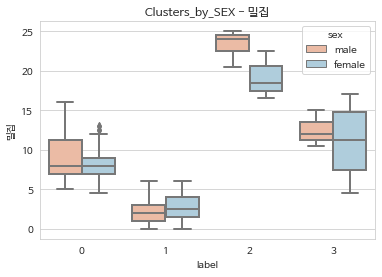

In [ ]:
sns.boxplot(x = "label", y = "밀집",  hue = "sex", palette = "RdBu", data = df, linewidth = 2, width = 0.8)
plt.title('Clusters_by_SEX - 밀집')
plt.show()

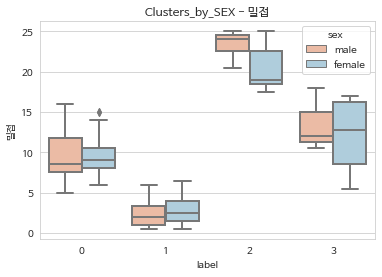

In [ ]:
sns.boxplot(x = "label", y = "밀접",  hue = "sex", palette = "RdBu", data = df, linewidth = 2, width = 0.8)
plt.title('Clusters_by_SEX - 밀접')
plt.show()

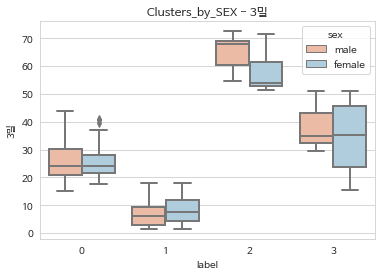

In [ ]:
sns.boxplot(x = "label", y = "3밀",  hue = "sex", palette = "RdBu", data = df, linewidth = 2, width = 0.8)
plt.title('Clusters_by_SEX - 3밀')
plt.show()

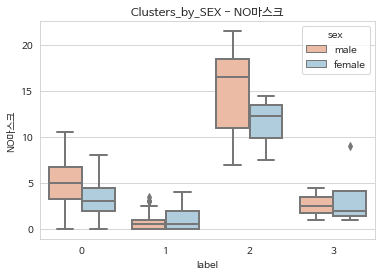

In [ ]:
sns.boxplot(x = "label", y = "NO마스크",  hue = "sex", palette = "RdBu", data = df, linewidth = 2, width = 0.8)
plt.title('Clusters_by_SEX - NO마스크')
plt.show()

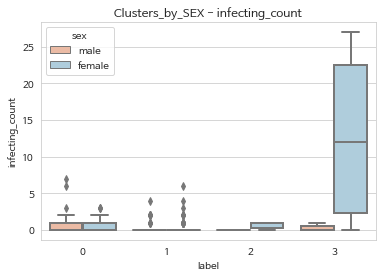

In [ ]:
sns.boxplot(x = "label", y = "infecting_count",  hue = "sex", palette = "RdBu", data = df, linewidth = 2, width = 0.8)
plt.title('Clusters_by_SEX - infecting_count')
plt.show()

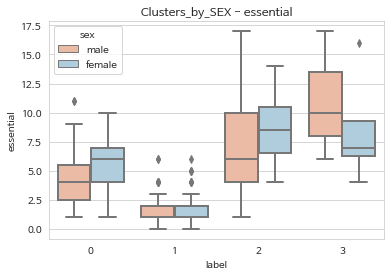

In [ ]:
sns.boxplot(x = "label", y = "essential",  hue = "sex", palette = "RdBu", data = df, linewidth = 2, width = 0.8)
plt.title('Clusters_by_SEX - essential')
plt.show()

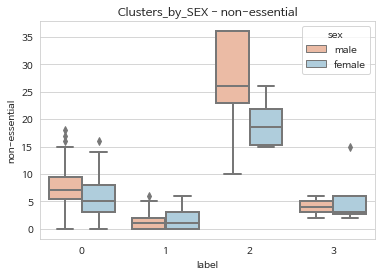

In [ ]:
sns.boxplot(x = "label", y = "non-essential",  hue = "sex", palette = "RdBu", data = df, linewidth = 2, width = 0.8)
plt.title('Clusters_by_SEX - non-essential')
plt.show()